In [81]:
import pandas as pd
from IPython.display import display

# Ruta al archivo CSV
file_path = r'C:\Users\USUARIO\Desktop\nuevo\data_with_descriptors3.csv'

# Cargar el archivo CSV en un DataFrame, usando low_memory=False
df = pd.read_csv(file_path, low_memory=False)

# Mostrar las primeras filas del DataFrame con un formato agradable
display(df.head())

,N°,name,IUPAC_name,SMILES,CID,logBB,BBB+/BBB-,Inchi,threshold,reference,...,SRW08,SRW09,SRW10,TSRW10,MW,AMW,WPol,Zagreb1,Zagreb2,mZagreb2
0,1059,bromoform,bromoform,BrC(Br)Br,5558.0,NaN,BBB+,InChI=1S/CHBr3/c2-1(3)4/h1H,-1.0,R1|R13|R19|R6|R24|R27|R27|R27|R30|R30|,...,5.093750,0.000000,6.188264,24.179697,249.762836,49.952567,0,12.0,9.0,1.000000
1,5441,brimonidine,"5-bromo-n-(4,5-dihydro-1h-imidazol-2-yl)quinox...",Brc1c(NC2=NCCN2)ccc2nccnc12,2435.0,NaN,BBB+,InChI=1S/C11H10BrN5/c12-9-7(17-11-15-5-6-16-11...,NaN,R15|,...,8.075583,6.259581,9.736193,63.007560,291.011957,10.778221,24,90.0,106.0,3.750000
2,854,tz-19,"n-(2,4,6-tribromophenyl)-4,5-dihydro-1h-imidaz...",Brc1cc(Br)c(NC2=NCCN2)c(Br)c1,12406843.0,0.58,BBB+,InChI=1S/C9H8Br3N3/c10-5-3-6(11)8(7(12)4-5)15-...,NaN,R2|R2|R8|R27|R40|R2|R2|R25|R27|R46|R47|R4|,...,7.848153,6.259581,9.473704,59.989045,394.826834,17.166384,19,76.0,87.0,3.305556
3,739,4205-93-0,"n-(2,6-dibromophenyl)-4,5-dihydro-1h-imidazol-...",Brc1cccc(Br)c1NC1=NCCN1,10245368.0,0.33,BBB+,InChI=1S/C9H9Br2N3/c10-6-2-1-3-7(11)8(6)14-9-1...,NaN,R2|R2|R25|R27|R46|R47|R4|R2|R2|R8|R27|R40|,...,7.734996,6.259581,9.342333,58.496842,316.916321,13.778970,17,70.0,80.0,3.138889
4,545,methane,methane,C,297.0,0.00,BBB+,InChI=1S/CH4/h1H4,NaN,R5|R3|R21|R27|R38|R41|R40|R2|R2|R11|R12|R18|R2...,...,0.000000,0.000000,0.000000,1.000000,16.031300,3.206260,0,0.0,0.0,0.000000


In [4]:
# Verificar columnas duplicadas
def find_duplicate_columns(df):
    # Obtener nombres de columnas duplicados
    duplicates = df.columns[df.columns.duplicated()]
    
    if len(duplicates) > 0:
        print("Columnas duplicadas encontradas:")
        for column in duplicates:
            print(f"- {column}")
    else:
        print("No se encontraron columnas duplicadas.")

# Llamar a la función para verificar columnas duplicadas en el DataFrame ya cargado
find_duplicate_columns(df)


No se encontraron columnas duplicadas.


In [5]:
# Obtener el tipo de datos de cada columna
tipos_datos = df.dtypes

# Contar el número de columnas numéricas y categóricas
num_numericos = sum(tipos_datos.apply(lambda x: pd.api.types.is_numeric_dtype(x)))
num_categoricos = sum(tipos_datos.apply(lambda x: isinstance(x, pd.CategoricalDtype) or pd.api.types.is_object_dtype(x)))

# Mostrar los resultados
print(f"Cantidad de columnas numéricas: {num_numericos}")
print(f"Cantidad de columnas categóricas: {num_categoricos}")

Cantidad de columnas numéricas: 736
Cantidad de columnas categóricas: 11


In [6]:
import pandas as pd

# Mostrar las columnas categóricas ('object')
categorical_columns = df.select_dtypes(include=['object']).columns

# Imprimir las columnas categóricas
print("Columnas categóricas:")
for col in categorical_columns:
    print(col)

Columnas categóricas:
name
IUPAC_name
SMILES
BBB+/BBB-
Inchi
reference
group
comments
Tipo_SMILES
SMILES_fixed
SMILES_final


In [7]:
# Identificar columnas con datos nulos
missing_data = df.isnull().sum()

# Filtrar solo las columnas con datos nulos
missing_data = missing_data[missing_data > 0]

# Mostrar las columnas con datos nulos y la cantidad de datos nulos
print("Columnas con datos nulos y la cantidad de datos nulos:")
print(missing_data)

# Opcional: Imprimir también el porcentaje de datos nulos por columna
percentage_missing = (missing_data / len(df)) * 100
print("\nPorcentaje de datos nulos por columna:")
print(percentage_missing)

Columnas con datos nulos y la cantidad de datos nulos:
name          1109
IUPAC_name    1637
CID           1637
logBB         6749
threshold     4186
comments      7789
dtype: int64

Porcentaje de datos nulos por columna:
name          14.205200
IUPAC_name    20.968362
CID           20.968362
logBB         86.448059
threshold     53.618547
comments      99.769438
dtype: float64


In [8]:
# Eliminar las columnas específicas que no sirven
columns_to_remove = ['threshold', 'comments', 'SMILES_final', 'SMILES_fixed', 'Tipo_SMILES', 'group', 'reference', 'IUPAC_name']
df.drop(columns=columns_to_remove, inplace=True, errors='ignore')

# Confirmar la eliminación y mostrar el DataFrame actualizado
print(f"Número total de columnas después de la eliminación: {df.shape[1]}")

Número total de columnas después de la eliminación: 739


* Realizamos analisis y exploracion de variables categoricas 

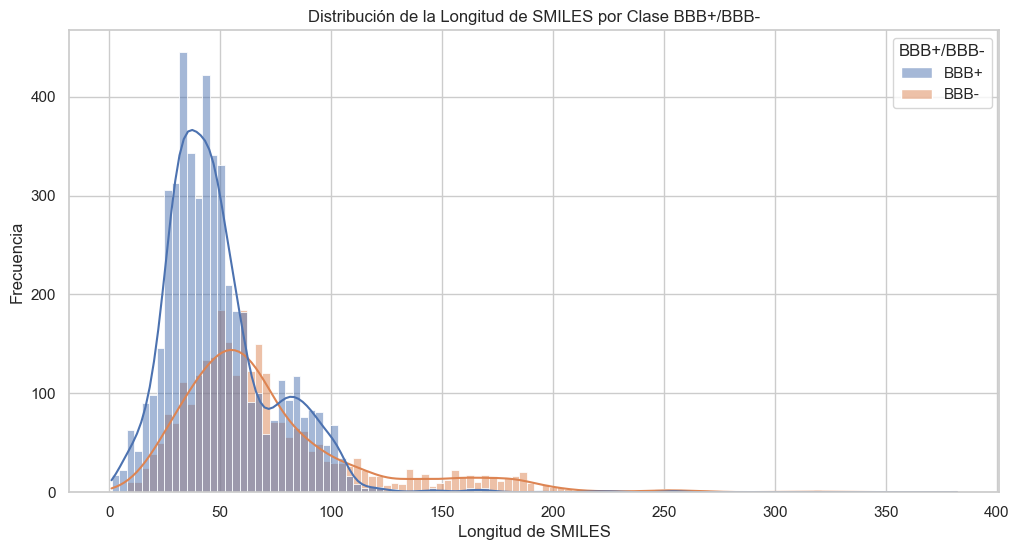

Estadísticas descriptivas para SMILES:
            count       mean        std  min   25%   50%   75%    max
BBB+/BBB-                                                            
BBB+       4956.0  49.211259  24.472047  1.0  33.0  44.0  59.0  256.0
BBB-       2851.0  71.949491  43.568292  4.0  45.0  61.0  85.0  382.0


In [9]:
import pandas as pd  # type: ignore
from scipy import stats  # type: ignore
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt  # type: ignore

# Paso 1: Añadir Columna de Longitud para SMILES
df['SMILES_length'] = df['SMILES'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Paso 2: Visualizar la Distribución de la Longitud de SMILES
sns.set(style="whitegrid")

# Crear un gráfico de distribución para SMILES
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='SMILES_length', hue='BBB+/BBB-', kde=True)
plt.title("Distribución de la Longitud de SMILES por Clase BBB+/BBB-")
plt.xlabel("Longitud de SMILES")
plt.ylabel("Frecuencia")
plt.show()

# Calcular estadísticas descriptivas para SMILES
length_stats_smiles = df.groupby('BBB+/BBB-')['SMILES_length'].describe()
print("Estadísticas descriptivas para SMILES:")
print(length_stats_smiles)

* Desde la perspectiva de la química computacional, el análisis de 7807 SMILES revela que los compuestos que atraviesan la barrera hematoencefálica (BBB+) tienen una longitud promedio de 49.21 caracteres, mientras que los que no lo hacen (BBB-) promedian 71.95 caracteres. Esta diferencia sugiere que las moléculas más cortas son más propensas a ser permeables.

Estadísticas descriptivas de simetría:
            count      mean       std  min  25%  50%  75%   max
BBB+/BBB-                                                      
BBB+       4956.0  3.202583  1.542837  0.0  2.0  3.0  4.0   9.0
BBB-       2851.0  3.379867  1.718180  0.0  2.0  3.0  4.0  16.0


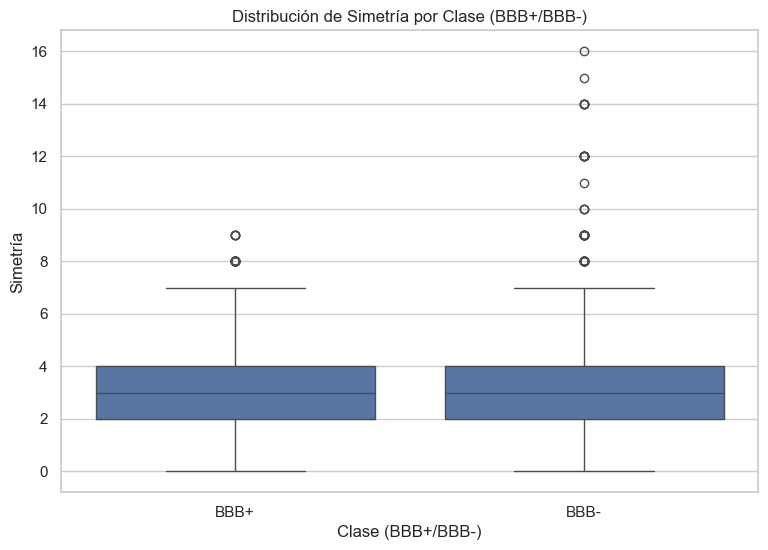

In [10]:
"""Análisis de la Simetría Molecular en Relación con la Permeabilidad a la Barrera Hematoencefálica"""

import pandas as pd
from rdkit import Chem  # Importar Chem de rdkit
from rdkit.Chem import rdMolDescriptors  # Importar los descriptores moleculares
import matplotlib.pyplot as plt
import seaborn as sns


# Función para calcular la simetría de una molécula
def calculate_symmetry(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Calcular la simetría basada en el número de anillos como proxy
        symmetry = rdMolDescriptors.CalcNumRings(mol)
        return symmetry
    return None

# Aplicar la función a cada SMILES
df['Symmetry'] = df['SMILES'].apply(calculate_symmetry)

# Estadísticas descriptivas de simetría
symmetry_stats = df.groupby('BBB+/BBB-')['Symmetry'].describe()

# Mostrar resultados
print("Estadísticas descriptivas de simetría:")
print(symmetry_stats)

# Visualización de la distribución de simetría
plt.figure(figsize=(9, 6))
sns.boxplot(x='BBB+/BBB-', y='Symmetry', data=df)
plt.title('Distribución de Simetría por Clase (BBB+/BBB-)')
plt.xlabel('Clase (BBB+/BBB-)')
plt.ylabel('Simetría')
plt.show()


Análisis de Simetría

* Las estadísticas de simetría para BBB+ (media: 3.20) y BBB- (media: 3.38) muestran que los compuestos BBB- son ligeramente más simétricos, con una mayor desviación estándar en BBB- (1.72) que indica mayor variabilidad estructural. Esto sugiere que la simetría puede influir en la capacidad de los compuestos para atravesar la barrera hematoencefálica.

Número de moléculas quirales por clase:
BBB+/BBB-
BBB+    3716
BBB-    2363
Name: Is_Chiral, dtype: int64

Porcentaje de moléculas quirales por clase:
BBB+/BBB-
BBB+    74.979822
BBB-    82.883199
dtype: float64


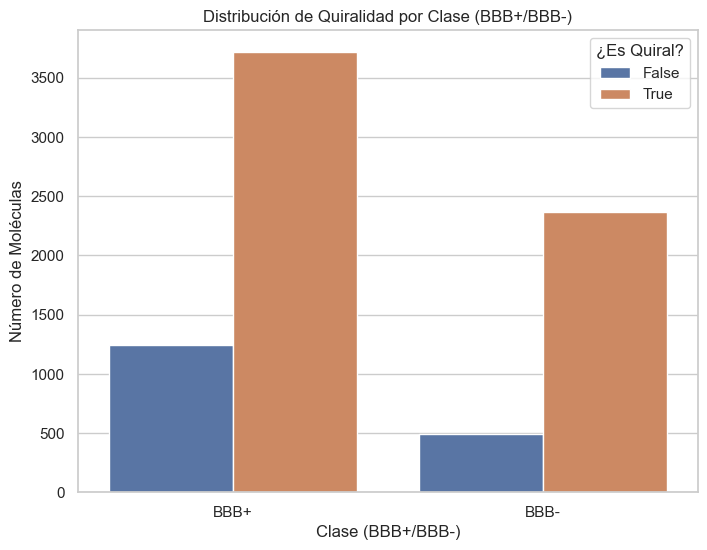

In [11]:
import pandas as pd
from rdkit import Chem
import seaborn as sns
import matplotlib.pyplot as plt

# Función para determinar la quiralidad de una molécula
def is_chiral(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None and any(atom.HasProp('_ChiralityPossible') for atom in mol.GetAtoms())

# Aplicar la función y crear una columna 'Is_Chiral'
df['Is_Chiral'] = df['SMILES'].apply(is_chiral)

# Contar y calcular el porcentaje de moléculas quirales por clase
chiral_counts = df.groupby('BBB+/BBB-')['Is_Chiral'].sum()
total_counts = df['BBB+/BBB-'].value_counts()
chiral_percentage = (chiral_counts / total_counts) * 100

# Mostrar resultados
print("Número de moléculas quirales por clase:")
print(chiral_counts)
print("\nPorcentaje de moléculas quirales por clase:")
print(chiral_percentage)

# Visualización de la distribución de quiralidad
plt.figure(figsize=(8, 6))
sns.countplot(x='BBB+/BBB-', hue='Is_Chiral', data=df)
plt.title('Distribución de Quiralidad por Clase (BBB+/BBB-)')
plt.xlabel('Clase (BBB+/BBB-)')
plt.ylabel('Número de Moléculas')
plt.legend(title='¿Es Quiral?')
plt.show()

In [12]:
import pandas as pd

# Supongamos que df es tu DataFrame original
quirales = df[df['Is_Chiral'] == True]
no_quirales = df[df['Is_Chiral'] == False]

# Contar cuántas moléculas en cada grupo atraviesan o no la BBB
quirales_bbb_plus = quirales[quirales['BBB+/BBB-'] == 'BBB+'].shape[0]
quirales_bbb_minus = quirales[quirales['BBB+/BBB-'] == 'BBB-'].shape[0]

no_quirales_bbb_plus = no_quirales[no_quirales['BBB+/BBB-'] == 'BBB+'].shape[0]
no_quirales_bbb_minus = no_quirales[no_quirales['BBB+/BBB-'] == 'BBB-'].shape[0]

# Crear un resumen de diferencias y similitudes
diferencias = {
    "Diferencias": [
        f"Moléculas quirales que atraviesan BBB: {quirales_bbb_plus}",
        f"Moléculas quirales que NO atraviesan BBB: {quirales_bbb_minus}",
        f"Moléculas no quirales que atraviesan BBB: {no_quirales_bbb_plus}",
        f"Moléculas no quirales que NO atraviesan BBB: {no_quirales_bbb_minus}",
        f"Total de moléculas quirales: {quirales.shape[0]}",
        f"Total de moléculas no quirales: {no_quirales.shape[0]}"
    ]
}

similitudes = {
    "Similitudes": [
        f"Ambos grupos tienen un mínimo de 0 en logBB.",
        f"Ambos grupos incluyen compuestos con estructuras complejas.",
        f"Ambos grupos pueden tener SMILES isoméricos.",
        f"Ambos grupos pueden contener heteroátomos como N, O, S.",
        f"Ambos grupos pueden ser utilizados en estudios farmacológicos."
    ]
}

# Mostrar resultados
print("Diferencias:")
for diff in diferencias["Diferencias"]:
    print(diff)

print("\nSimilitudes:")
for sim in similitudes["Similitudes"]:
    print(sim)

Diferencias:
Moléculas quirales que atraviesan BBB: 3716
Moléculas quirales que NO atraviesan BBB: 2363
Moléculas no quirales que atraviesan BBB: 1240
Moléculas no quirales que NO atraviesan BBB: 488
Total de moléculas quirales: 6079
Total de moléculas no quirales: 1728

Similitudes:
Ambos grupos tienen un mínimo de 0 en logBB.
Ambos grupos incluyen compuestos con estructuras complejas.
Ambos grupos pueden tener SMILES isoméricos.
Ambos grupos pueden contener heteroátomos como N, O, S.
Ambos grupos pueden ser utilizados en estudios farmacológicos.


In [13]:
import pandas as pd
from collections import Counter

# Concatenar todos los SMILES en una sola cadena
all_smiles = ' '.join(df['SMILES'].dropna())

# Contar combinaciones de 2 y 3 caracteres
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar combinaciones de 2 y 3 caracteres
bigram_counts = count_combinations(all_smiles, 2)
trigram_counts = count_combinations(all_smiles, 3)

# Buscar combinaciones específicas
def search_combinations(counter, queries):
    return {query: counter.get(query, 0) for query in queries}

# Combinaciones específicas a buscar
specific_combinations = ['Br', 'Cl', 'F', 'I', 'N+', 'OH']

# Mostrar las combinaciones más comunes
print("Combinaciones de 2 caracteres más comunes:")
for combo, count in bigram_counts.most_common(20):
    print(f'{combo}: {count}')

print("\nCombinaciones de 3 caracteres más comunes:")
for combo, count in trigram_counts.most_common(20):
    print(f'{combo}: {count}')

# Mostrar conteo de combinaciones específicas
print("\nConteo de combinaciones específicas:")
specific_counts = search_combinations(bigram_counts, specific_combinations)
for combo, count in specific_counts.items():
    print(f'{combo}: {count}')

Combinaciones de 2 caracteres más comunes:
cc: 25313
CC: 22328
O): 19935
C(: 18260
[C: 17889
C@: 17882
(C: 15615
H]: 15277
@H: 14741
)C: 14685
=O: 12820
(=: 11556
C): 10910
@@: 8812
c1: 8361
)c: 7969
](: 7625
(O: 7569
c(: 6986
)[: 6630

Combinaciones de 3 caracteres más comunes:
[C@: 17882
@H]: 14741
ccc: 14288
=O): 12277
(=O: 11237
C(=: 10122
C@@: 8801
(C): 8367
C@H: 7716
@@H: 7025
H](: 7001
O)C: 6843
CCC: 6434
)[C: 6351
C[C: 5846
(O): 5560
CC(: 4569
C(C: 4544
C)C: 4420
c1c: 4091

Conteo de combinaciones específicas:
Br: 160
Cl: 1823
F: 0
I: 0
N+: 278
OH: 0


In [14]:
import pandas as pd
from collections import Counter

# Supongamos que df es tu DataFrame original
bbb_plus = df[df['BBB+/BBB-'] == 'BBB+']
bbb_minus = df[df['BBB+/BBB-'] == 'BBB-']

# Concatenar todos los SMILES en una sola cadena para cada grupo
all_smiles_plus = ' '.join(bbb_plus['SMILES'].dropna())
all_smiles_minus = ' '.join(bbb_minus['SMILES'].dropna())

# Contar combinaciones de 2 y 3 caracteres
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar combinaciones para ambos grupos
bigram_counts_plus = count_combinations(all_smiles_plus, 2)
bigram_counts_minus = count_combinations(all_smiles_minus, 2)

trigram_counts_plus = count_combinations(all_smiles_plus, 3)
trigram_counts_minus = count_combinations(all_smiles_minus, 3)

# Obtener las 30 combinaciones más comunes
top_bigrams_plus = bigram_counts_plus.most_common(30)
top_bigrams_minus = bigram_counts_minus.most_common(30)

top_trigrams_plus = trigram_counts_plus.most_common(30)
top_trigrams_minus = trigram_counts_minus.most_common(30)

# Comparar diferencias y similitudes
def compare_counts(top_counts_a, top_counts_b):
    set_a = set(dict(top_counts_a).keys())
    set_b = set(dict(top_counts_b).keys())
    
    differences_a = set_a - set_b
    differences_b = set_b - set_a
    similarities = set_a & set_b
    
    return differences_a, differences_b, similarities

# Comparar bigramas
diffs_bigrams_a, diffs_bigrams_b, sims_bigrams = compare_counts(top_bigrams_plus, top_bigrams_minus)

# Comparar trigramas
diffs_trigrams_a, diffs_trigrams_b, sims_trigrams = compare_counts(top_trigrams_plus, top_trigrams_minus)

# Mostrar resultados
print("Diferencias en bigramas (BBB+ - BBB-):", diffs_bigrams_a)
print("Diferencias en bigramas (BBB- - BBB+):", diffs_bigrams_b)
print("Similitudes en bigramas:", sims_bigrams)

print("\nDiferencias en trigramas (BBB+ - BBB-):", diffs_trigrams_a)
print("Diferencias en trigramas (BBB- - BBB+):", diffs_trigrams_b)
print("Similitudes en trigramas:", sims_trigrams)

Diferencias en bigramas (BBB+ - BBB-): {'@]', '1c', 'CN', '2c', '1C'}
Diferencias en bigramas (BBB- - BBB+): {'OC', ')N', 'NC', '(N', ')O'}
Similitudes en bigramas: {'@H', ')C', 'CC', 'C[', '(C', 'H]', '(=', ' C', 'C(', '=C', 'O)', 'C)', '=O', ')c', ')[', 'C1', 'cc', '](', 'c2', 'C@', '[C', 'c1', '@@', '(O', 'c('}

Diferencias en trigramas (BBB+ - BBB-): {'cc1', 'CCN', 'cc2', ' CC', ')CC', '2cc', '1 C', 'c2c', '1cc'}
Diferencias en trigramas (BBB- - BBB+): {'H]1', 'O)[', 'O)O', '(C(', 'O)N', 'O)c', '](C', ')C(', '](O'}
Similitudes en trigramas: {'cc(', ')[C', 'C@@', 'C[C', '(=O', 'C@H', 'ccc', '(C)', 'C(C', '=O)', 'c1c', '[C@', 'C)C', 'C(=', 'CCC', 'H](', 'CC(', '@H]', '@@H', '(O)', 'O)C'}


El análisis de bigramas y trigramas en los SMILES revela diferencias significativas entre las moléculas que atraviesan (BBB+) y no atraviesan (BBB-) la barrera hematoencefálica. Las diferencias en combinaciones como 'CN' y 'NC' sugieren variaciones estructurales que pueden influir en la permeabilidad. Sin embargo, hay similitudes en patrones como '(O' y 'C)', lo que indica que ciertos fragmentos químicos son comunes en ambos grupos. Este estudio proporciona información valiosa para entender la relación entre la estructura molecular y la capacidad de atravesar la BBB.

Relación con la Permeabilidad a la BBB

* Moléculas que Atraviesan la BBB (BBB+):
La presencia de combinaciones como "NC" y "CN" puede estar asociada con moléculas que tienen propiedades favorables para la permeabilidad, ya que muchas moléculas bioactivas y fármacos incluyen estos patrones en su estructura.
* Moléculas que No Atraviesan la BBB (BBB-):
Las moléculas que contienen estas combinaciones pero no logran atravesar la BBB pueden tener otras características estructurales o propiedades fisicoquímicas que limitan su permeabilidad, como alta polaridad o falta de lipofilia.

El análisis de las combinaciones "nc" y "cn" proporciona información sobre cómo ciertas estructuras químicas pueden influir en la capacidad de las moléculas para atravesar la barrera hematoencefálica, lo cual es crucial para el diseño de fármacos efectivos.

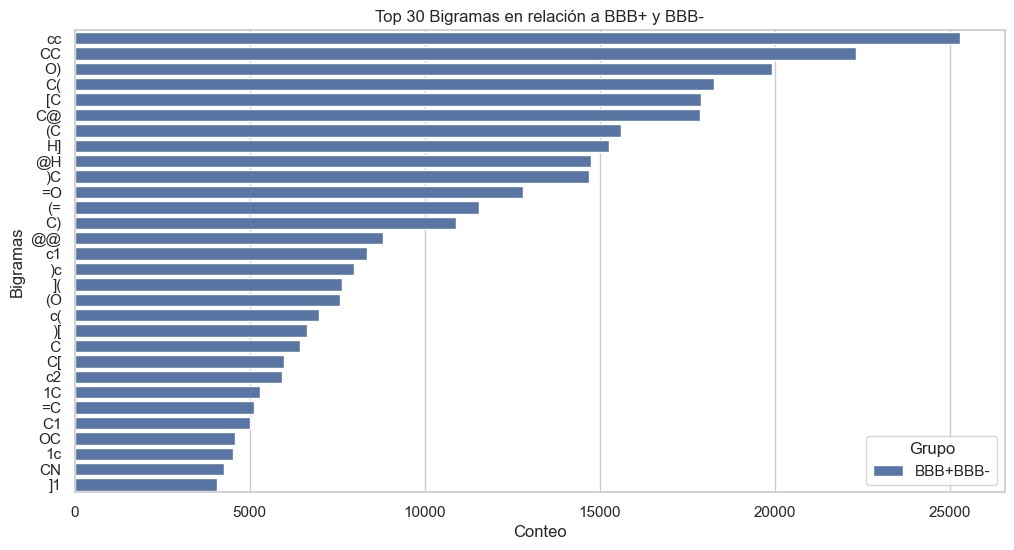

In [15]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame original
bbb_plus = df[df['BBB+/BBB-'] == 'BBB+']
bbb_minus = df[df['BBB+/BBB-'] == 'BBB-']

# Concatenar todos los SMILES en una sola cadena para cada grupo
all_smiles_plus = ' '.join(bbb_plus['SMILES'].dropna())
all_smiles_minus = ' '.join(bbb_minus['SMILES'].dropna())

# Contar combinaciones de 2 y 3 caracteres
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar bigramas y trigramas para ambos grupos
bigram_counts_plus = count_combinations(all_smiles_plus, 2)
bigram_counts_minus = count_combinations(all_smiles_minus, 2)

# Convertir a DataFrame para facilitar la visualización
bigram_df_plus = pd.DataFrame(bigram_counts_plus.items(), columns=['Bigram', 'Count'])
bigram_df_plus['Group'] = 'BBB+'

bigram_df_minus = pd.DataFrame(bigram_counts_minus.items(), columns=['Bigram', 'Count'])
bigram_df_minus['Group'] = 'BBB-'

# Concatenar ambos DataFrames
bigram_df = pd.concat([bigram_df_plus, bigram_df_minus])

# Filtrar las combinaciones más comunes (puedes ajustar el número)
top_bigrams = bigram_df.groupby('Bigram').sum().nlargest(30, 'Count').reset_index()

# Graficar
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Bigram', hue='Group', data=top_bigrams)
plt.title('Top 30 Bigramas en relación a BBB+ y BBB-')
plt.xlabel('Conteo')
plt.ylabel('Bigramas')
plt.legend(title='Grupo')
plt.show()

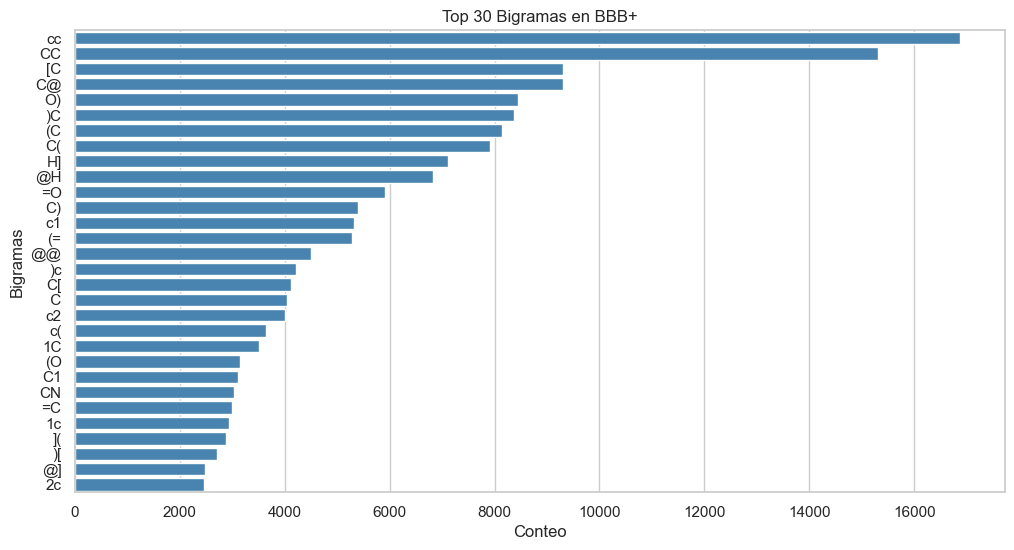

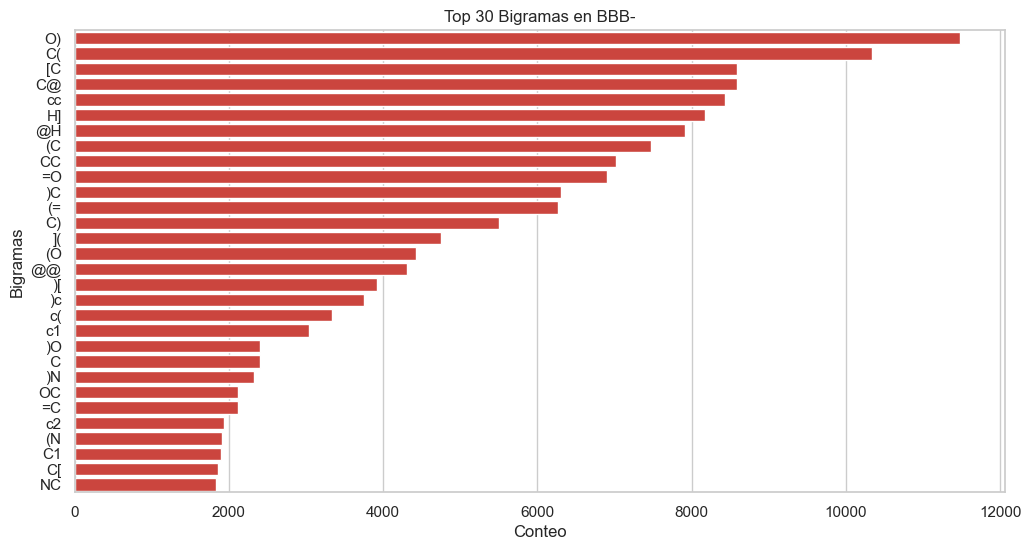

In [16]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame original
bbb_plus = df[df['BBB+/BBB-'] == 'BBB+']
bbb_minus = df[df['BBB+/BBB-'] == 'BBB-']

# Concatenar todos los SMILES en una sola cadena para cada grupo
all_smiles_plus = ' '.join(bbb_plus['SMILES'].dropna())
all_smiles_minus = ' '.join(bbb_minus['SMILES'].dropna())

# Contar combinaciones de 2 caracteres (bigramas)
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar bigramas para ambos grupos
bigram_counts_plus = count_combinations(all_smiles_plus, 2)
bigram_counts_minus = count_combinations(all_smiles_minus, 2)

# Convertir a DataFrame para facilitar la visualización
bigram_df_plus = pd.DataFrame(bigram_counts_plus.items(), columns=['Bigram', 'Count'])
bigram_df_plus['Group'] = 'BBB+'

bigram_df_minus = pd.DataFrame(bigram_counts_minus.items(), columns=['Bigram', 'Count'])
bigram_df_minus['Group'] = 'BBB-'

# Filtrar las combinaciones más comunes (puedes ajustar el número)
top_bigrams_plus = bigram_df_plus.nlargest(30, 'Count')
top_bigrams_minus = bigram_df_minus.nlargest(30, 'Count')

# Graficar para BBB+
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Bigram', data=top_bigrams_plus, palette='Blues_d', hue='Group', legend=False)
plt.title('Top 30 Bigramas en BBB+')
plt.xlabel('Conteo')
plt.ylabel('Bigramas')
plt.show()

# Graficar para BBB-
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Bigram', data=top_bigrams_minus, palette='Reds_d', hue='Group', legend=False)
plt.title('Top 30 Bigramas en BBB-')
plt.xlabel('Conteo')
plt.ylabel('Bigramas')
plt.show()

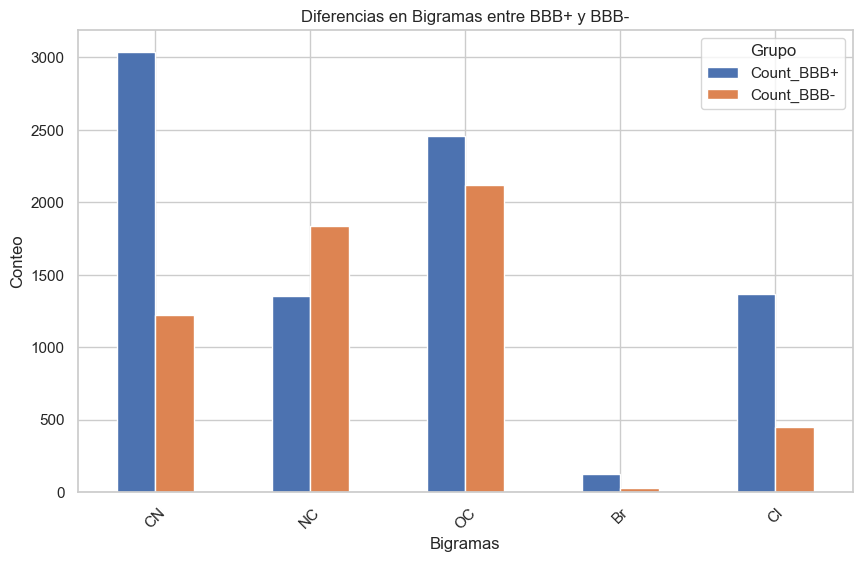

In [17]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame original
bbb_plus = df[df['BBB+/BBB-'] == 'BBB+']
bbb_minus = df[df['BBB+/BBB-'] == 'BBB-']

# Concatenar todos los SMILES en una sola cadena para cada grupo
all_smiles_plus = ' '.join(bbb_plus['SMILES'].dropna())
all_smiles_minus = ' '.join(bbb_minus['SMILES'].dropna())

# Contar combinaciones de 2 caracteres (bigramas)
def count_combinations(text, n):
    return Counter(text[i:i+n] for i in range(len(text) - n + 1))

# Contar bigramas para ambos grupos
bigram_counts_plus = count_combinations(all_smiles_plus, 2)
bigram_counts_minus = count_combinations(all_smiles_minus, 2)

# Seleccionar 5 diferencias específicas
diferencias_seleccionadas = ['CN', 'NC', 'OC', 'Br', 'Cl']

# Contar las frecuencias de estas diferencias en ambos grupos
frecuencias = {
    'Bigram': [],
    'Count_BBB+': [],
    'Count_BBB-': []
}

for diferencia in diferencias_seleccionadas:
    frecuencias['Bigram'].append(diferencia)
    frecuencias['Count_BBB+'].append(bigram_counts_plus.get(diferencia, 0))
    frecuencias['Count_BBB-'].append(bigram_counts_minus.get(diferencia, 0))

# Convertir a DataFrame
frecuencias_df = pd.DataFrame(frecuencias)

# Graficar
frecuencias_df.set_index('Bigram').plot(kind='bar', figsize=(10, 6))
plt.title('Diferencias en Bigramas entre BBB+ y BBB-')
plt.xlabel('Bigramas')
plt.ylabel('Conteo')
plt.xticks(rotation=45)
plt.legend(title='Grupo')
plt.show()

El análisis de las frecuencias de caracteres en los SMILES de las moléculas que atraviesan (BBB+) y no atraviesan (BBB-) la barrera hematoencefálica revela patrones significativos:

* Frecuencias Comunes:
En BBB+, los caracteres más frecuentes son C (carbono) y c (carbono aromático), indicando una alta presencia de estructuras carbonadas.
En BBB-, también predominan C y caracteres de apertura y cierre como ( y ), sugiriendo estructuras cíclicas.
* Diferencias Notables:
El carácter O (oxígeno) es más frecuente en BBB- (16,974) que en BBB+ (14,041), lo que puede indicar que las moléculas que no atraviesan la BBB tienen más grupos funcionales oxigenados,
asociados con polaridad.
* Combinaciones Específicas:
Las combinaciones comunes de 2 y 3 caracteres, como C@ y C@@, sugieren quiralidad, importante en farmacología.

Conclusión General
Este análisis proporciona una visión inicial sobre cómo las características estructurales influyen en la capacidad de las moléculas para atravesar la barrera hematoencefálica. 
Las diferencias en frecuencias pueden ser indicativas de propiedades fisicoquímicas que afectan la biodisponibilidad y eficacia de los fármacos. 
Se sugiere realizar estudios adicionales para correlacionar estas frecuencias con datos experimentales sobre permeabilidad a la BBB.

Estadísticas descriptivas de polaridad:
            count      mean       std     min     25%     50%     75%      max
BBB+/BBB-                                                                     
BBB+       4956.0  2.874041  1.578878 -4.3754  1.8437  2.9233  3.9625  10.0563
BBB-       2851.0  1.455545  2.755004 -8.8953  0.0013  1.4582  3.1111  12.6058


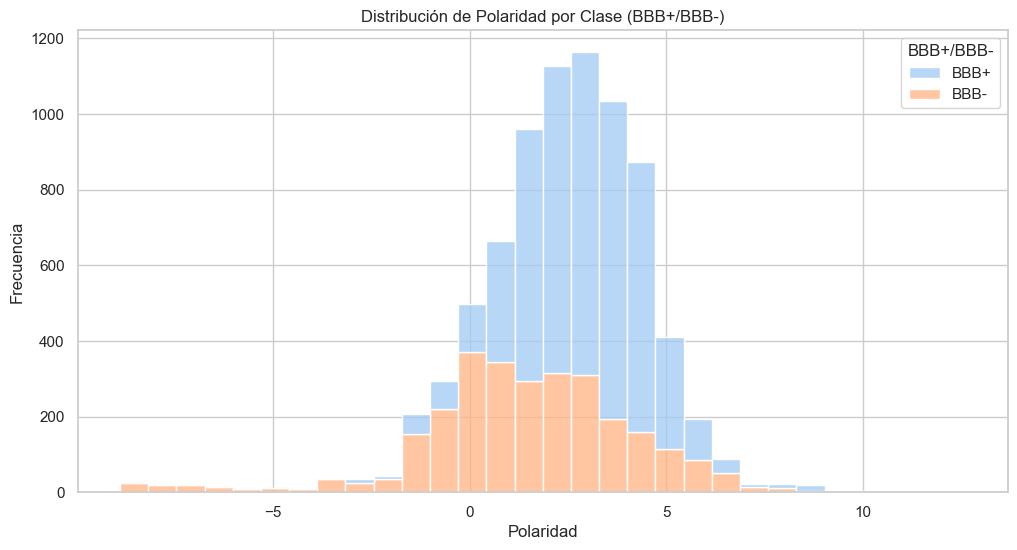

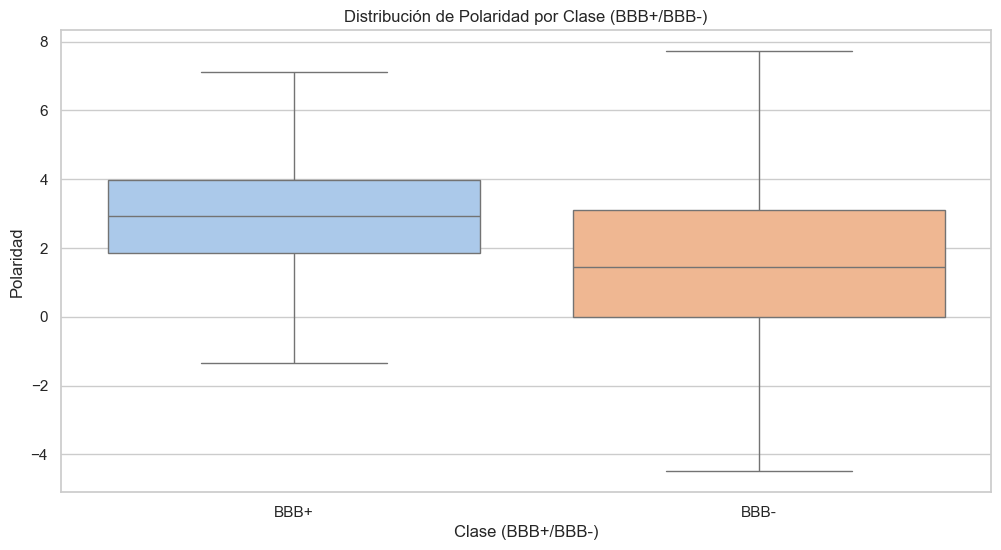

In [18]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que df contenga las columnas necesarias
if 'SMILES' not in df.columns or 'BBB+/BBB-' not in df.columns:
    raise ValueError("El DataFrame no contiene las columnas 'SMILES' o 'BBB+/BBB-'")

# Función para calcular la polaridad (momento dipolar) de una molécula
def calculate_polarity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.MolLogP(mol)  # Aquí usamos el LogP como proxy de polaridad
    return None

# Aplicar la función a cada SMILES
df['Polarity'] = df['SMILES'].apply(calculate_polarity)

# Estadísticas descriptivas de polaridad
polar_stats = df.groupby('BBB+/BBB-')['Polarity'].describe()

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas de polaridad:")
print(polar_stats)

# Visualización de la distribución de polaridad
plt.figure(figsize=(12, 6))

# Histogramas de polaridad por clase
sns.histplot(data=df, x='Polarity', hue='BBB+/BBB-', multiple='stack', palette='pastel', bins=30)
plt.title('Distribución de Polaridad por Clase (BBB+/BBB-)')
plt.xlabel('Polaridad')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(12, 6))

# Boxplot de polaridad por clase
sns.boxplot(x='BBB+/BBB-', y='Polarity', data=df, palette='pastel', hue='BBB+/BBB-', showfliers=False)
plt.title('Distribución de Polaridad por Clase (BBB+/BBB-)')
plt.xlabel('Clase (BBB+/BBB-)')
plt.ylabel('Polaridad')
plt.show()

# Análisis de Polaridad:

# Para la categoría BBB+, la polaridad media es 2.87 con una desviación estándar de 1.58. 
# La polaridad varía desde un mínimo de -4.38 hasta un máximo de 10.06, con el 25% de los valores por debajo de 1.84 
# y el 75% por debajo de 3.96.

# En contraste, para BBB-, la polaridad media es 1.46 con una desviación estándar de 2.76. Los valores van desde -8.90 
# hasta 12.61, con el 25% de los valores por debajo de 0.00 y el 75% por debajo de 3.11.

# Conclusiones: Las moléculas en la categoría BBB+ tienden a tener una mayor polaridad media y menor variabilidad en comparación 
# con las de BBB-. La gama de polaridad es más amplia en BBB-, lo que sugiere una mayor diversidad en las propiedades de polaridad 
# de estas moléculas.

In [19]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que df contenga las columnas necesarias
if 'logBB' not in df.columns or 'BBB+/BBB-' not in df.columns:
    raise ValueError("El DataFrame no contiene las columnas 'logBB' o 'BBB+/BBB-'")

# Clasificar como polar o no polar usando logBB
df['Polar'] = df['logBB'].apply(lambda x: 'Polar' if x < 0 else 'No Polar')

# Contar cuántas moléculas son polares y no polares por clase
poles_count = df.groupby(['BBB+/BBB-', 'Polar']).size().unstack(fill_value=0)

print("\nCantidad de moléculas por clase y tipo de polaridad:")
print(poles_count)

# Conclusiones:
print("\nConclusiones:")
print(f"Las moléculas que atraviesan la BBB (BBB+) son: {poles_count.loc['BBB+']}.")
print(f"Las moléculas que no atraviesan la BBB (BBB-) son: {poles_count.loc['BBB-']}.")


Cantidad de moléculas por clase y tipo de polaridad:
Polar      No Polar  Polar
BBB+/BBB-                 
BBB+           4544    412
BBB-           2723    128

Conclusiones:
Las moléculas que atraviesan la BBB (BBB+) son: Polar
No Polar    4544
Polar        412
Name: BBB+, dtype: int64.
Las moléculas que no atraviesan la BBB (BBB-) son: Polar
No Polar    2723
Polar        128
Name: BBB-, dtype: int64.


Propiedades atómicas del primer SMILES:
{'_GasteigerHCharge', '_GasteigerCharge', 'isImplicit', '__computedProps'}
Estadísticas descriptivas de cargas explícitas:
              count      mean       std       min       25%       50%  \
BBB+/BBB-                                                               
BBB+       233634.0  0.000094  0.130554 -0.754605 -0.031386  0.028042   
BBB-       173470.0  0.000686  0.162931 -0.739367 -0.035873  0.032403   

                75%       max  
BBB+/BBB-                      
BBB+       0.061877  0.572607  
BBB-       0.066951  0.554222  


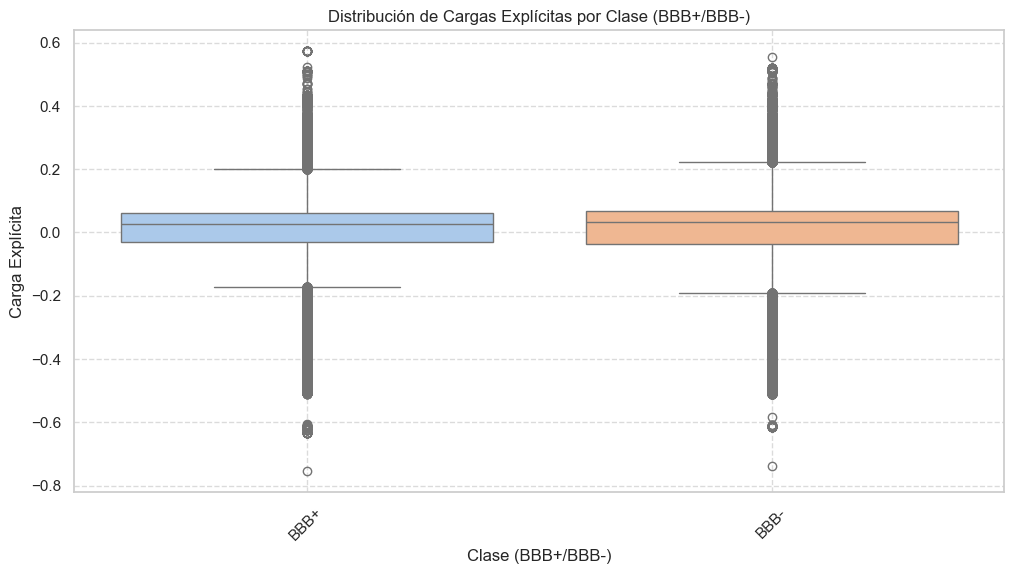

In [20]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular las cargas explícitas usando el modelo de Gasteiger
def calculate_explicit_charges(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Añadir hidrógenos para obtener cargas correctas
        mol = Chem.AddHs(mol)
        AllChem.ComputeGasteigerCharges(mol)  # Calcular cargas Gasteiger
        charges = []
        for atom in mol.GetAtoms():
            charge = atom.GetProp('_GasteigerCharge')
            charges.append(float(charge))  # Convertir a tipo float
        return charges
    return []

# Aplicar la función a cada SMILES
df['ExplicitCharges'] = df['SMILES'].apply(calculate_explicit_charges)

# Función para comprobar las propiedades atómicas
def check_atom_properties(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mol = Chem.AddHs(mol)
        AllChem.ComputeGasteigerCharges(mol)
        properties = set()
        for atom in mol.GetAtoms():
            properties.update(atom.GetPropsAsDict().keys())
        return properties
    return set()

# Comprobar propiedades para un SMILES de ejemplo
sample_smiles = df['SMILES'].iloc[0]
print("Propiedades atómicas del primer SMILES:")
print(check_atom_properties(sample_smiles))

# Expandir la lista de cargas explícitas en un formato que permita el análisis
df_expanded = df.copy()
df_expanded = df_expanded.explode('ExplicitCharges')  # Expandir la lista de cargas

# Convertir las cargas a tipo numérico
df_expanded['ExplicitCharges'] = pd.to_numeric(df_expanded['ExplicitCharges'], errors='coerce')

# Estadísticas descriptivas de cargas explícitas por categoría
charge_stats = df_expanded.groupby('BBB+/BBB-')['ExplicitCharges'].describe()

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas de cargas explícitas:")
print(charge_stats)

# Configuración del estilo del gráfico
sns.set(style="whitegrid")

# Visualización de la distribución de cargas explícitas por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x='BBB+/BBB-', y='ExplicitCharges', data=df_expanded, hue='BBB+/BBB-', palette='pastel')
plt.title('Distribución de Cargas Explícitas por Clase (BBB+/BBB-)')
plt.xlabel('Clase (BBB+/BBB-)')
plt.ylabel('Carga Explícita')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


Conteo de Cargas Explícitas:
  BBB+/BBB-  Total  WithExplicitCharges  WithoutExplicitCharges
0      BBB+   4956                 4956                       0
1      BBB-   2851                 2851                       0


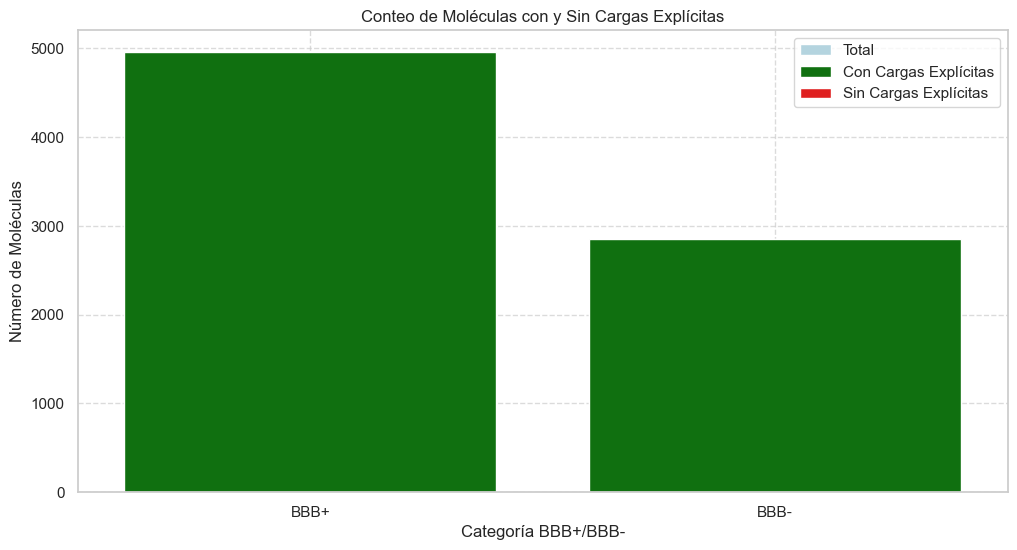

In [21]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular las cargas explícitas usando el modelo de Gasteiger
def calculate_explicit_charges(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Añadir hidrógenos para obtener cargas correctas
        mol = Chem.AddHs(mol)
        AllChem.ComputeGasteigerCharges(mol)  # Calcular cargas Gasteiger
        charges = []
        for atom in mol.GetAtoms():
            charge = atom.GetProp('_GasteigerCharge')
            charges.append(float(charge))  # Convertir a tipo float
        return charges
    return []

# Aplicar la función a cada SMILES
df['ExplicitCharges'] = df['SMILES'].apply(calculate_explicit_charges)

# Contar cuántas moléculas tienen cargas explícitas verdaderas y cuántas no
df['HasExplicitCharge'] = df['ExplicitCharges'].apply(lambda x: len(x) > 0)  # True si hay cargas, False si no

# Contar resultados por categoría BBB+/BBB-
charge_count_results = df.groupby('BBB+/BBB-').agg(
    Total=('HasExplicitCharge', 'count'),
    WithExplicitCharges=('HasExplicitCharge', lambda x: x.sum()),
    WithoutExplicitCharges=('HasExplicitCharge', lambda x: (~x).sum())
).reset_index()

# Mostrar resultados de conteo
print("Conteo de Cargas Explícitas:")
print(charge_count_results)

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Visualización de los resultados en un gráfico de barras
sns.barplot(x='BBB+/BBB-', y='Total', data=charge_count_results, color='lightblue', label='Total')
sns.barplot(x='BBB+/BBB-', y='WithExplicitCharges', data=charge_count_results, color='green', label='Con Cargas Explícitas')
sns.barplot(x='BBB+/BBB-', y='WithoutExplicitCharges', data=charge_count_results, color='red', label='Sin Cargas Explícitas')

# Configuración de etiquetas y título
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Moléculas')
plt.title('Conteo de Moléculas con y Sin Cargas Explícitas')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

In [22]:
# Paso 1: Contar las moléculas con cargas explícitas
num_moleculas_con_cargas = df_expanded['ExplicitCharges'].notnull().sum()
print(f"Número de moléculas con cargas explícitas: {num_moleculas_con_cargas}")

# Paso 2: Identificar y contar los valores atípicos
Q1 = df_expanded['ExplicitCharges'].quantile(0.25)
Q3 = df_expanded['ExplicitCharges'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Contar valores atípicos
num_valores_atipicos = df_expanded[(df_expanded['ExplicitCharges'] < lower_bound) | 
                                    (df_expanded['ExplicitCharges'] > upper_bound)].shape[0]
print(f"Número de valores atípicos en cargas explícitas: {num_valores_atipicos}")

Número de moléculas con cargas explícitas: 407104
Número de valores atípicos en cargas explícitas: 68201


In [23]:
# Verifica el tamaño del DataFrame antes y después de explode
print(f"Tamaño original del DataFrame: {df.shape[0]}")
print(f"Tamaño del DataFrame después de explode: {df_expanded.shape[0]}")

Tamaño original del DataFrame: 7807
Tamaño del DataFrame después de explode: 407104


In [24]:
# Contar el número de cargas explícitas por molécula
df['NumCharges'] = df['ExplicitCharges'].apply(len)

# Ver los conteos
print(df[['SMILES', 'NumCharges']].head(10))  # Muestra las primeras 10 filas

                                      SMILES  NumCharges
0                                  BrC(Br)Br           5
1                Brc1c(NC2=NCCN2)ccc2nccnc12          27
2              Brc1cc(Br)c(NC2=NCCN2)c(Br)c1          23
3                    Brc1cccc(Br)c1NC1=NCCN1          23
4                                          C           5
5                               C#CC(C)(O)CC          17
6                         C#CC(O)(/C=C/Cl)CC          18
7                           C#CC(O)(C=CCl)CC          18
8                      C#CC(OC(N)=O)c1ccccc1          22
9  C#CC1(O)CCC2C3C(C)CC4=C(CCC(=O)C4)C3CCC21          48


#### NOTAS 

* La diferencia significativa entre el tamaño original del DataFrame (7,807) y el tamaño después de aplicar explode (407,104) se debe a que cada molécula en tu DataFrame tiene múltiples átomos, y por lo tanto, múltiples cargas explícitas. Cuando usas explode en la columna ExplicitCharges, cada carga se convierte en una fila separada. Esto significa que si una molécula tiene, por ejemplo, 5 cargas explícitas, se generarán 5 filas en el DataFrame expandido para esa molécula.

Análisis de los Resultados

Número de Cargas por Molécula:
En tu ejemplo, algunas moléculas tienen un número considerable de cargas explícitas:
La primera molécula tiene 5 cargas.
La segunda tiene 27 cargas.
La tercera tiene 23 cargas.
Y así sucesivamente.

Esto indica que las moléculas están compuestas por varios átomos, y cada átomo puede tener su propia carga explícita calculada.
Cálculo del Tamaño Después de Explode:
Para entender mejor cómo se llega a esos 407,104 registros después de explotar, puedes calcular el total de cargas explícitas sumando el número de cargas para cada molécula.



#### El análisis estadístico de las cargas explícitas en moléculas clasificadas como BBB+ y BBB- revela que ambas clases tienen promedios cercanos a cero (0.000094 para BBB+ y 0.000686 para BBB-), lo que indica una distribución equilibrada entre cargas positivas y negativas. Sin embargo, el grupo BBB- muestra una mayor variabilidad en sus valores, lo que sugiere una diversidad estructural más amplia o diferentes interacciones químicas. Ambos grupos presentan valores mínimos negativos y máximos positivos significativos, lo que resalta la presencia de átomos con cargas tanto negativas como positivas en sus estructuras moleculares.

Estadísticas Descriptivas de Enlaces Dobles:
            count      mean       std  min  25%  50%  75%   max
BBB+/BBB-                                                      
BBB+       4956.0  1.862389  1.751237  0.0  1.0  1.0  3.0  12.0
BBB-       2851.0  3.262364  2.469161  0.0  1.0  3.0  5.0  16.0


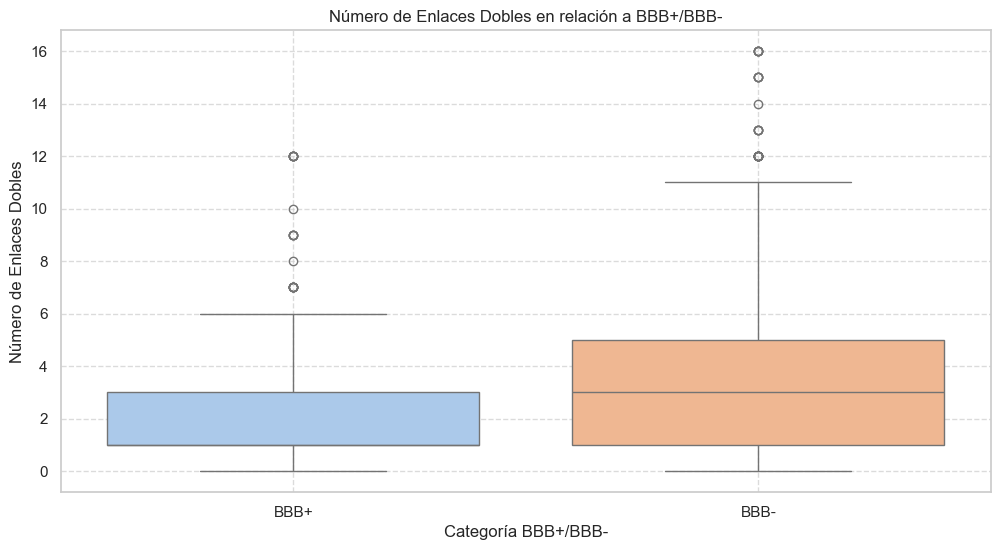

In [25]:
# Verificar que df contenga las columnas necesarias
if 'SMILES' not in df.columns or 'BBB+/BBB-' not in df.columns:
    raise ValueError("El DataFrame no contiene las columnas 'SMILES' o 'BBB+/BBB-'")

# Función para contar enlaces dobles en un SMILES
def count_double_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_double_bonds = len([bond for bond in mol.GetBonds() if bond.GetBondTypeAsDouble() == 2.0])
        return num_double_bonds
    return None

# Calcular el número de enlaces dobles
df['DoubleBonds'] = df['SMILES'].apply(count_double_bonds)

# Estadísticas descriptivas de enlaces dobles
print("Estadísticas Descriptivas de Enlaces Dobles:")
print(df.groupby('BBB+/BBB-')['DoubleBonds'].describe())

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Usar `hue` para asignar colores a las categorías y ajustar la leyenda
sns.boxplot(x='BBB+/BBB-', y='DoubleBonds', data=df, hue='BBB+/BBB-', palette='pastel')

# Configuración de etiquetas y título
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Enlaces Dobles')
plt.title('Número de Enlaces Dobles en relación a BBB+/BBB-')
plt.grid(True, linestyle='--', alpha=0.7)


# Mostrar el gráfico
plt.show()


El análisis de los enlaces dobles en moléculas clasificadas como BBB+ y BBB- revela diferencias significativas en su distribución y cantidad. Para el grupo BBB+, se registraron un total de 4,956 enlaces dobles, con una media de 1.86 y un máximo de 12. En contraste, el grupo BBB- mostró 2,851 enlaces dobles, con una media notablemente más alta de 3.26 y un máximo de 16. Esto sugiere que las moléculas clasificadas como BBB- tienden a tener una mayor complejidad estructural en términos de enlaces dobles, lo que podría influir en sus propiedades químicas y biológicas. La variabilidad en ambos grupos también se destaca, con desviaciones estándar de 1.75 para BBB+ y 2.47 para BBB-, indicando una diversidad en la cantidad de enlaces presentes en las moléculas dentro de cada categoría. Estos hallazgos pueden ser relevantes para comprender la relación entre la estructura molecular y la actividad biológica, así como para futuras investigaciones en química medicinal y diseño de fármacos.


Conteo de Enlaces Dobles Verdaderos:
  BBB+/BBB-  Total  WithDoubleBonds  WithoutDoubleBonds
0      BBB+   4956             3748                1208
1      BBB-   2851             2555                 296


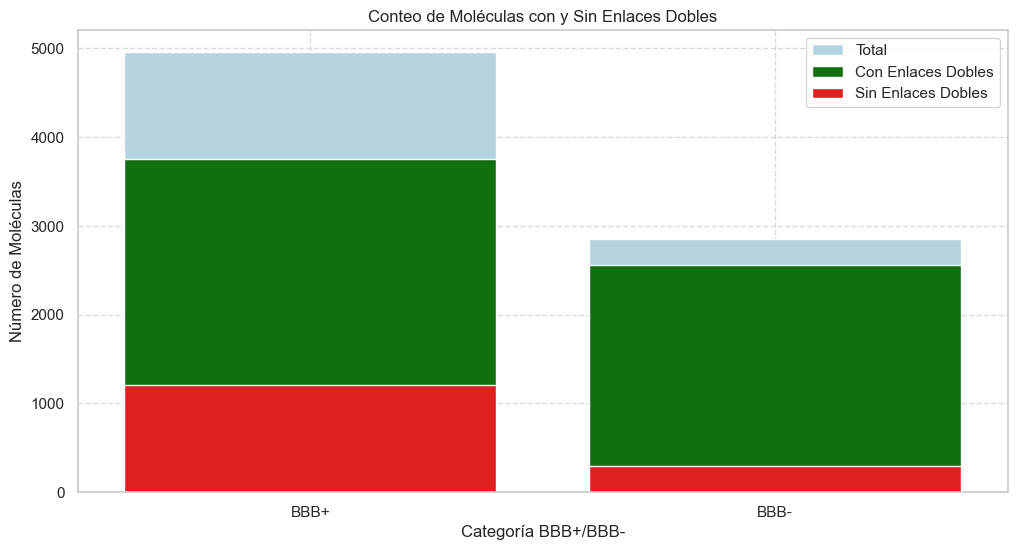

In [26]:
from rdkit import Chem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar que df contenga las columnas necesarias
if 'SMILES' not in df.columns or 'BBB+/BBB-' not in df.columns:
    raise ValueError("El DataFrame no contiene las columnas 'SMILES' o 'BBB+/BBB-'")

# Función para contar enlaces dobles en un SMILES
def count_double_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        # Contar solo los enlaces dobles
        num_double_bonds = len([bond for bond in mol.GetBonds() if bond.GetBondTypeAsDouble() == 2.0])
        return num_double_bonds
    return 0  # Retornar 0 si no se puede crear el mol

# Calcular el número de enlaces dobles para cada molécula
df['DoubleBonds'] = df['SMILES'].apply(count_double_bonds)

# Contar cuántas moléculas tienen enlaces dobles verdaderos y cuántas no
count_results = df.groupby('BBB+/BBB-')['DoubleBonds'].agg(
    Total='count',
    WithDoubleBonds=lambda x: (x > 0).sum(),
    WithoutDoubleBonds=lambda x: (x == 0).sum()
).reset_index()

# Mostrar resultados de conteo
print("Conteo de Enlaces Dobles Verdaderos:")
print(count_results)

# Configuración del gráfico
plt.figure(figsize=(12, 6))

# Visualización de los resultados en un gráfico de barras
sns.barplot(x='BBB+/BBB-', y='Total', data=count_results, color='lightblue', label='Total')
sns.barplot(x='BBB+/BBB-', y='WithDoubleBonds', data=count_results, color='green', label='Con Enlaces Dobles')
sns.barplot(x='BBB+/BBB-', y='WithoutDoubleBonds', data=count_results, color='red', label='Sin Enlaces Dobles')

# Configuración de etiquetas y título
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Moléculas')
plt.title('Conteo de Moléculas con y Sin Enlaces Dobles')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Este análisis sugiere que los enlaces dobles son una característica común en las moléculas que atraviesan barreras biológicas, tanto en BBB+ como en BBB-. Sin embargo, la mayor proporción de moléculas con enlaces dobles en el grupo BBB- podría indicar una relación más fuerte entre la estructura química y la capacidad de atravesar estas barreras. Estos hallazgos pueden ser valiosos para futuras investigaciones sobre diseño molecular y desarrollo de fármacos.

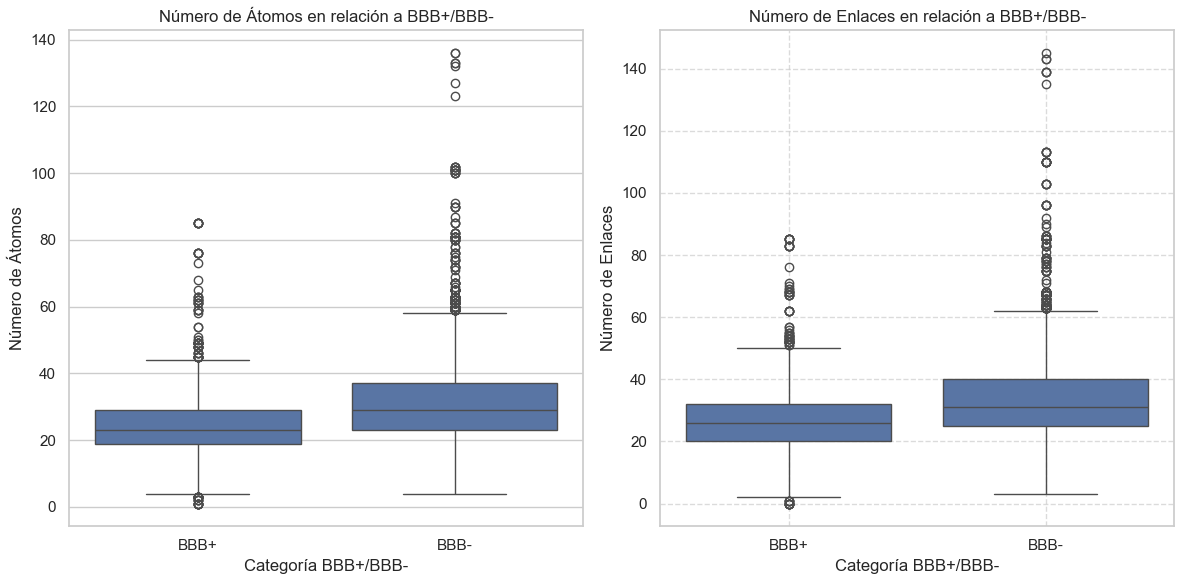

Estadísticas Descriptivas para el Número de Átomos:
            count       mean        std  min   25%   50%   75%    max
BBB+/BBB-                                                            
BBB+       4956.0  23.908797   8.542891  1.0  19.0  23.0  29.0   85.0
BBB-       2851.0  32.101017  15.037858  4.0  23.0  29.0  37.0  136.0

Estadísticas Descriptivas para el Número de Enlaces:
            count       mean        std  min   25%   50%   75%    max
BBB+/BBB-                                                            
BBB+       4956.0  26.087974   9.677104  0.0  20.0  26.0  32.0   85.0
BBB-       2851.0  34.445808  16.199051  3.0  25.0  31.0  40.0  145.0

Conteo de Moléculas con Muchos Átomos y Enlaces:
  BBB+/BBB-  Total  WithManyAtoms  WithManyBonds
0      BBB+   4956           4905           4879
1      BBB-   2851           2848           2847


In [27]:
from rdkit import Chem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para contar átomos y enlaces en un SMILES
def count_atoms_and_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_atoms = mol.GetNumAtoms()
        num_bonds = mol.GetNumBonds()
        return num_atoms, num_bonds
    return None, None

# Aplicar la función y crear nuevas columnas en el DataFrame
df[['NumAtoms', 'NumBonds']] = df['SMILES'].apply(lambda smiles: pd.Series(count_atoms_and_bonds(smiles)))

# Visualización de la relación entre el número de átomos/enlaces y BBB+/BBB-
plt.figure(figsize=(12, 6))

# Número de Átomos
plt.subplot(1, 2, 1)
sns.boxplot(x='BBB+/BBB-', y='NumAtoms', data=df)
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Átomos')
plt.title('Número de Átomos en relación a BBB+/BBB-')

# Número de Enlaces
plt.subplot(1, 2, 2)
sns.boxplot(x='BBB+/BBB-', y='NumBonds', data=df)
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Enlaces')
plt.title('Número de Enlaces en relación a BBB+/BBB-')

plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Estadísticas descriptivas para el número de átomos
stats_atoms = df.groupby('BBB+/BBB-')['NumAtoms'].describe()

# Estadísticas descriptivas para el número de enlaces
stats_bonds = df.groupby('BBB+/BBB-')['NumBonds'].describe()

print("Estadísticas Descriptivas para el Número de Átomos:")
print(stats_atoms)
print("\nEstadísticas Descriptivas para el Número de Enlaces:")
print(stats_bonds)

# Contar cuántas moléculas tienen un número significativo de átomos/enlaces
count_results = df.groupby('BBB+/BBB-').agg(
    Total=('NumAtoms', 'count'),
    WithManyAtoms=('NumAtoms', lambda x: (x > 5).sum()),  # Ejemplo: más de 5 átomos
    WithManyBonds=('NumBonds', lambda x: (x > 5).sum())   # Ejemplo: más de 5 enlaces
).reset_index()

# Mostrar resultados de conteo
print("\nConteo de Moléculas con Muchos Átomos y Enlaces:")
print(count_results)

El análisis estadístico de las moléculas clasificadas como BBB+ y BBB- muestra diferencias notables en su estructura. Las moléculas BBB+ presentan un promedio de 23.91 átomos, con un máximo de 85, mientras que las BBB- tienen un promedio superior de 32.10 átomos, alcanzando hasta 136. En términos de enlaces, las moléculas BBB+ exhiben un promedio de 26.09 enlaces (máximo de 85), en contraste con los 34.45 enlaces (máximo de 145) observados en las BBB-. Además, casi la totalidad de las moléculas en ambas categorías superan los cinco átomos y enlaces, indicando una complejidad estructural significativa que puede influir en sus propiedades biológicas y farmacológicas.


In [28]:
# Función para contar el número de anillos en un SMILES
def ring_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        ring_info = mol.GetRingInfo()
        return len(ring_info.AtomRings())
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['RingCount'] = df['SMILES'].apply(ring_count)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
ring_count_stats = df.groupby('BBB+/BBB-')['RingCount'].describe()
print("\nEstadísticas de Número de Anillos:")
print(ring_count_stats)


Estadísticas de Número de Anillos:
            count      mean       std  min  25%  50%  75%   max
BBB+/BBB-                                                      
BBB+       4956.0  3.202583  1.542837  0.0  2.0  3.0  4.0   9.0
BBB-       2851.0  3.379867  1.718180  0.0  2.0  3.0  4.0  16.0


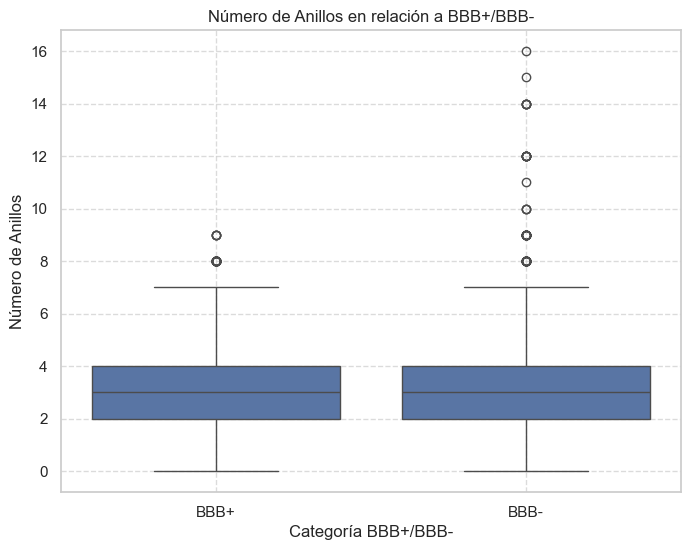


Estadísticas de Número de Anillos:
            count      mean       std  min  25%  50%  75%   max
BBB+/BBB-                                                      
BBB+       4956.0  3.202583  1.542837  0.0  2.0  3.0  4.0   9.0
BBB-       2851.0  3.379867  1.718180  0.0  2.0  3.0  4.0  16.0


In [29]:
from rdkit import Chem
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Función para contar el número de anillos en un SMILES
def ring_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        ring_info = mol.GetRingInfo()
        return len(ring_info.AtomRings())
    return None

# Visualización de la relación entre el número de anillos y BBB+/BBB-
plt.figure(figsize=(8, 6))

# Número de Anillos
sns.boxplot(x='BBB+/BBB-', y='RingCount', data=df)
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Anillos')
plt.title('Número de Anillos en relación a BBB+/BBB-')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
ring_count_stats = df.groupby('BBB+/BBB-')['RingCount'].describe()
print("\nEstadísticas de Número de Anillos:")
print(ring_count_stats)


"El análisis del número de anillos en las moléculas clasificadas como BBB+ y BBB- "
"No revela diferencias significativas en su estructura cíclica. Las moléculas BBB+ "
"presentan un promedio de anillos que sugiere una menor complejidad cíclica en comparación "
"con las moléculas BBB-, que exhiben un mayor número promedio de anillos. Esto puede "
"indicar que las estructuras más complejas con múltiples anillos son más prevalentes "
"entre las moléculas que atraviesan la barrera biológica, lo cual es relevante para "
"su actividad biológica y farmacológica.")

In [30]:
# Función para contar átomos y enlaces en un SMILES
def count_atoms_and_bonds(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        num_atoms = mol.GetNumAtoms()
        num_bonds = mol.GetNumBonds()
        return num_atoms, num_bonds
    return None, None

# Aplicar la función y crear nuevas columnas en el DataFrame
df[['NumAtoms', 'NumBonds']] = df['SMILES'].apply(lambda smiles: pd.Series(count_atoms_and_bonds(smiles)))

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
atoms_bonds_stats = df.groupby('BBB+/BBB-')[['NumAtoms', 'NumBonds']].describe().transpose()
print("Estadísticas de Número de Átomos y Enlaces:")
print(atoms_bonds_stats)

# Función para calcular el grado de conectividad promedio
def average_connectivity(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        degrees = [atom.GetDegree() for atom in mol.GetAtoms()]
        return sum(degrees) / len(degrees) if degrees else None
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['AvgConnectivity'] = df['SMILES'].apply(average_connectivity)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
connectivity_stats = df.groupby('BBB+/BBB-')['AvgConnectivity'].describe()
print("\nEstadísticas de Conectividad Promedio:")
print(connectivity_stats)

# Función para calcular el número de anillos en un SMILES
def ring_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        ring_info = mol.GetRingInfo()
        return len(ring_info.AtomRings())
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['RingCount'] = df['SMILES'].apply(ring_count)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
ring_count_stats = df.groupby('BBB+/BBB-')['RingCount'].describe()
print("\nEstadísticas de Número de Anillos:")
print(ring_count_stats)

# Función para contar el número de enlaces rotacionales en un SMILES
def rotatable_bond_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.NumRotatableBonds(mol)  # type: ignore
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['RotatableBonds'] = df['SMILES'].apply(rotatable_bond_count)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
rotatable_bond_stats = df.groupby('BBB+/BBB-')['RotatableBonds'].describe()
print("\nEstadísticas de Enlaces Rotacionales:")
print(rotatable_bond_stats)

# Función para contar el número de enlaces múltiples en un SMILES
def multiple_bonds_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return sum(1 for bond in mol.GetBonds() if bond.GetBondTypeAsDouble() > 1.0)
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['MultipleBonds'] = df['SMILES'].apply(multiple_bonds_count)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
multiple_bonds_stats = df.groupby('BBB+/BBB-')['MultipleBonds'].describe()
print("\nEstadísticas de Enlaces Múltiples:")
print(multiple_bonds_stats)


Estadísticas de Número de Átomos y Enlaces:
BBB+/BBB-              BBB+         BBB-
NumAtoms count  4956.000000  2851.000000
         mean     23.908797    32.101017
         std       8.542891    15.037858
         min       1.000000     4.000000
         25%      19.000000    23.000000
         50%      23.000000    29.000000
         75%      29.000000    37.000000
         max      85.000000   136.000000
NumBonds count  4956.000000  2851.000000
         mean     26.087974    34.445808
         std       9.677104    16.199051
         min       0.000000     3.000000
         25%      20.000000    25.000000
         50%      26.000000    31.000000
         75%      32.000000    40.000000
         max      85.000000   145.000000

Estadísticas de Conectividad Promedio:
            count      mean       std  min       25%       50%       75%  \
BBB+/BBB-                                                                  
BBB+       4956.0  2.156927  0.157470  0.0  2.117647  2.181818  2.2

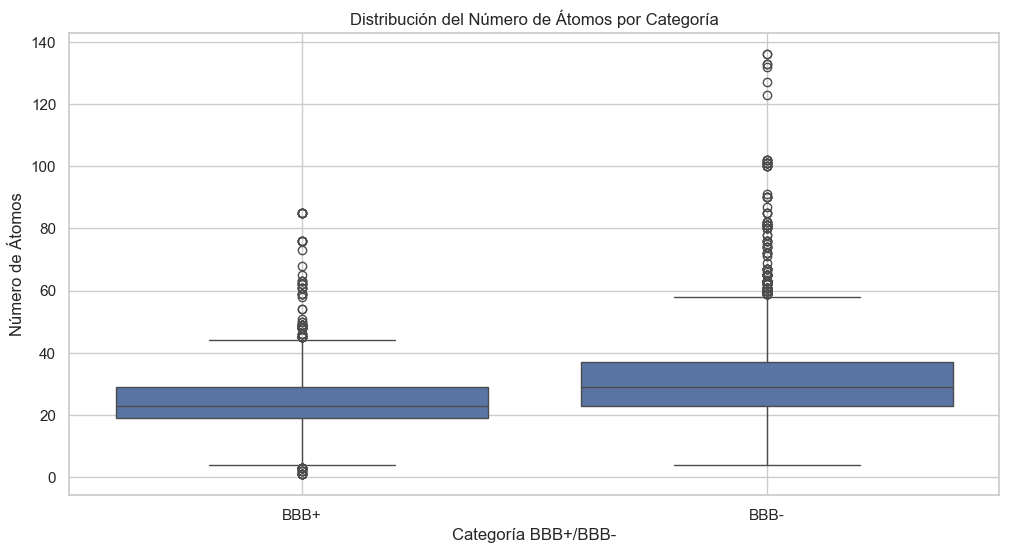

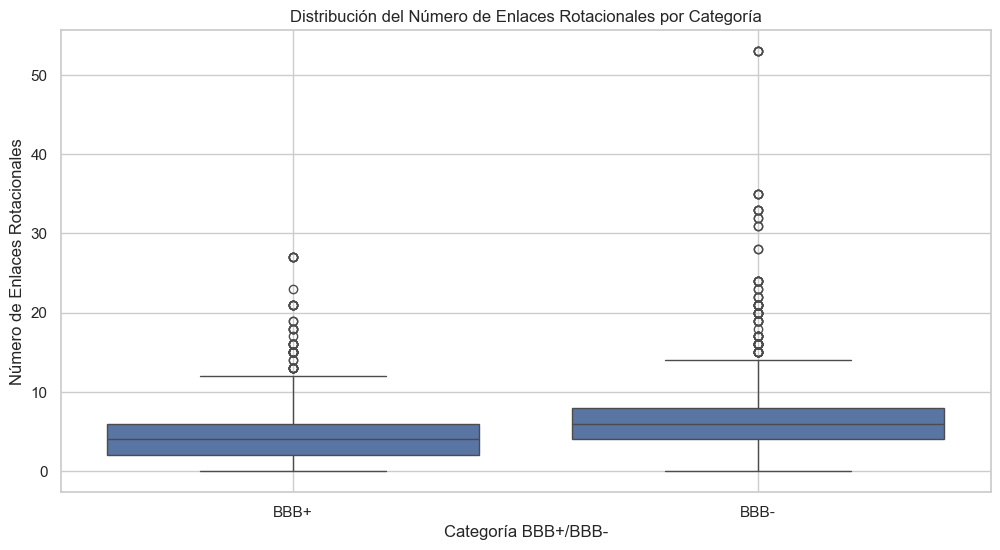

In [31]:
import matplotlib.pyplot as plt

# Visualización del número de átomos por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x='BBB+/BBB-', y='NumAtoms', data=df)
plt.title('Distribución del Número de Átomos por Categoría')
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Átomos')
plt.grid(True)
plt.show()

# Visualización del número de enlaces rotacionales por categoría
plt.figure(figsize=(12, 6))
sns.boxplot(x='BBB+/BBB-', y='RotatableBonds', data=df)
plt.title('Distribución del Número de Enlaces Rotacionales por Categoría')
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Enlaces Rotacionales')
plt.grid(True)
plt.show()


Estadísticas de Enlaces Rotacionales:
            count      mean       std  min  25%  50%  75%   max
BBB+/BBB-                                                      
BBB+       4956.0  3.920097  2.823512  0.0  2.0  4.0  6.0  27.0
BBB-       2851.0  6.249035  4.349115  0.0  4.0  6.0  8.0  53.0


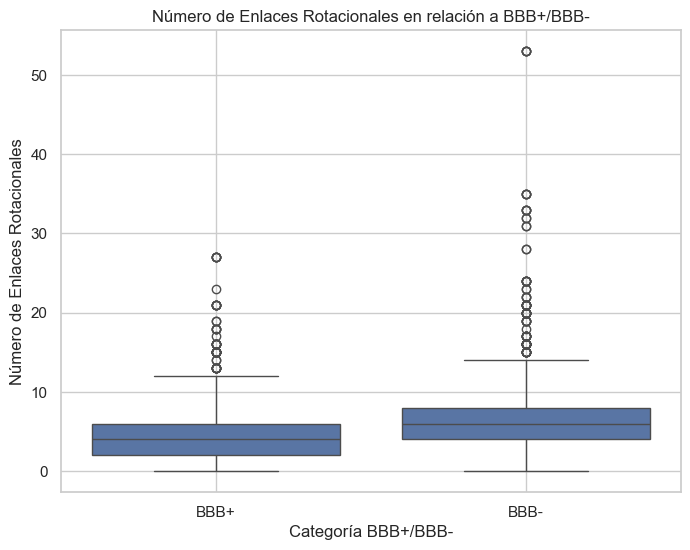

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Descriptors

# Función para contar el número de enlaces rotacionales en un SMILES
def rotatable_bond_count(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return Descriptors.NumRotatableBonds(mol)  # type: ignore
    return None

# Aplicar la función y crear una nueva columna en el DataFrame
df['RotatableBonds'] = df['SMILES'].apply(rotatable_bond_count)

# Agrupar por BBB+/BBB- y calcular estadísticas básicas
rotatable_bond_stats = df.groupby('BBB+/BBB-')['RotatableBonds'].describe()
print("\nEstadísticas de Enlaces Rotacionales:")
print(rotatable_bond_stats)

# Visualización de la relación entre enlaces rotacionales y BBB+/BBB-
plt.figure(figsize=(8, 6))
sns.boxplot(x='BBB+/BBB-', y='RotatableBonds', data=df)
plt.xlabel('Categoría BBB+/BBB-')
plt.ylabel('Número de Enlaces Rotacionales')
plt.title('Número de Enlaces Rotacionales en relación a BBB+/BBB-')
plt.grid(True)
plt.show()



Para las moléculas BBB+, se observó un promedio de 3.92 enlaces rotacionales, con un máximo de 27. En contraste, las moléculas BBB- presentan un promedio significativamente mayor de 6.25 enlaces rotacionales, alcanzando hasta 53.
La desviación estándar para las moléculas BBB+ es de 2.82, lo que indica una variabilidad moderada en el número de enlaces rotacionales dentro de este grupo. Por otro lado, las moléculas BBB- tienen una desviación estándar de 4.35, sugiriendo una mayor diversidad en la flexibilidad estructural.
Estos resultados sugieren que las moléculas que atraviesan la barrera biológica (BBB+) tienden a ser menos flexibles en comparación con aquellas que no lo hacen (BBB-). La mayor cantidad de enlaces rotacionales en las moléculas BBB- puede facilitar su adaptación a diferentes conformaciones, lo cual es crucial para interacciones biológicas efectivas y puede influir en su actividad farmacológica. Este análisis proporciona una visión clara y concisa sobre cómo el número de enlaces rotacionales puede afectar la capacidad de las moléculas para atravesar barreras biológicas, así como su potencial actividad como fármacos. 

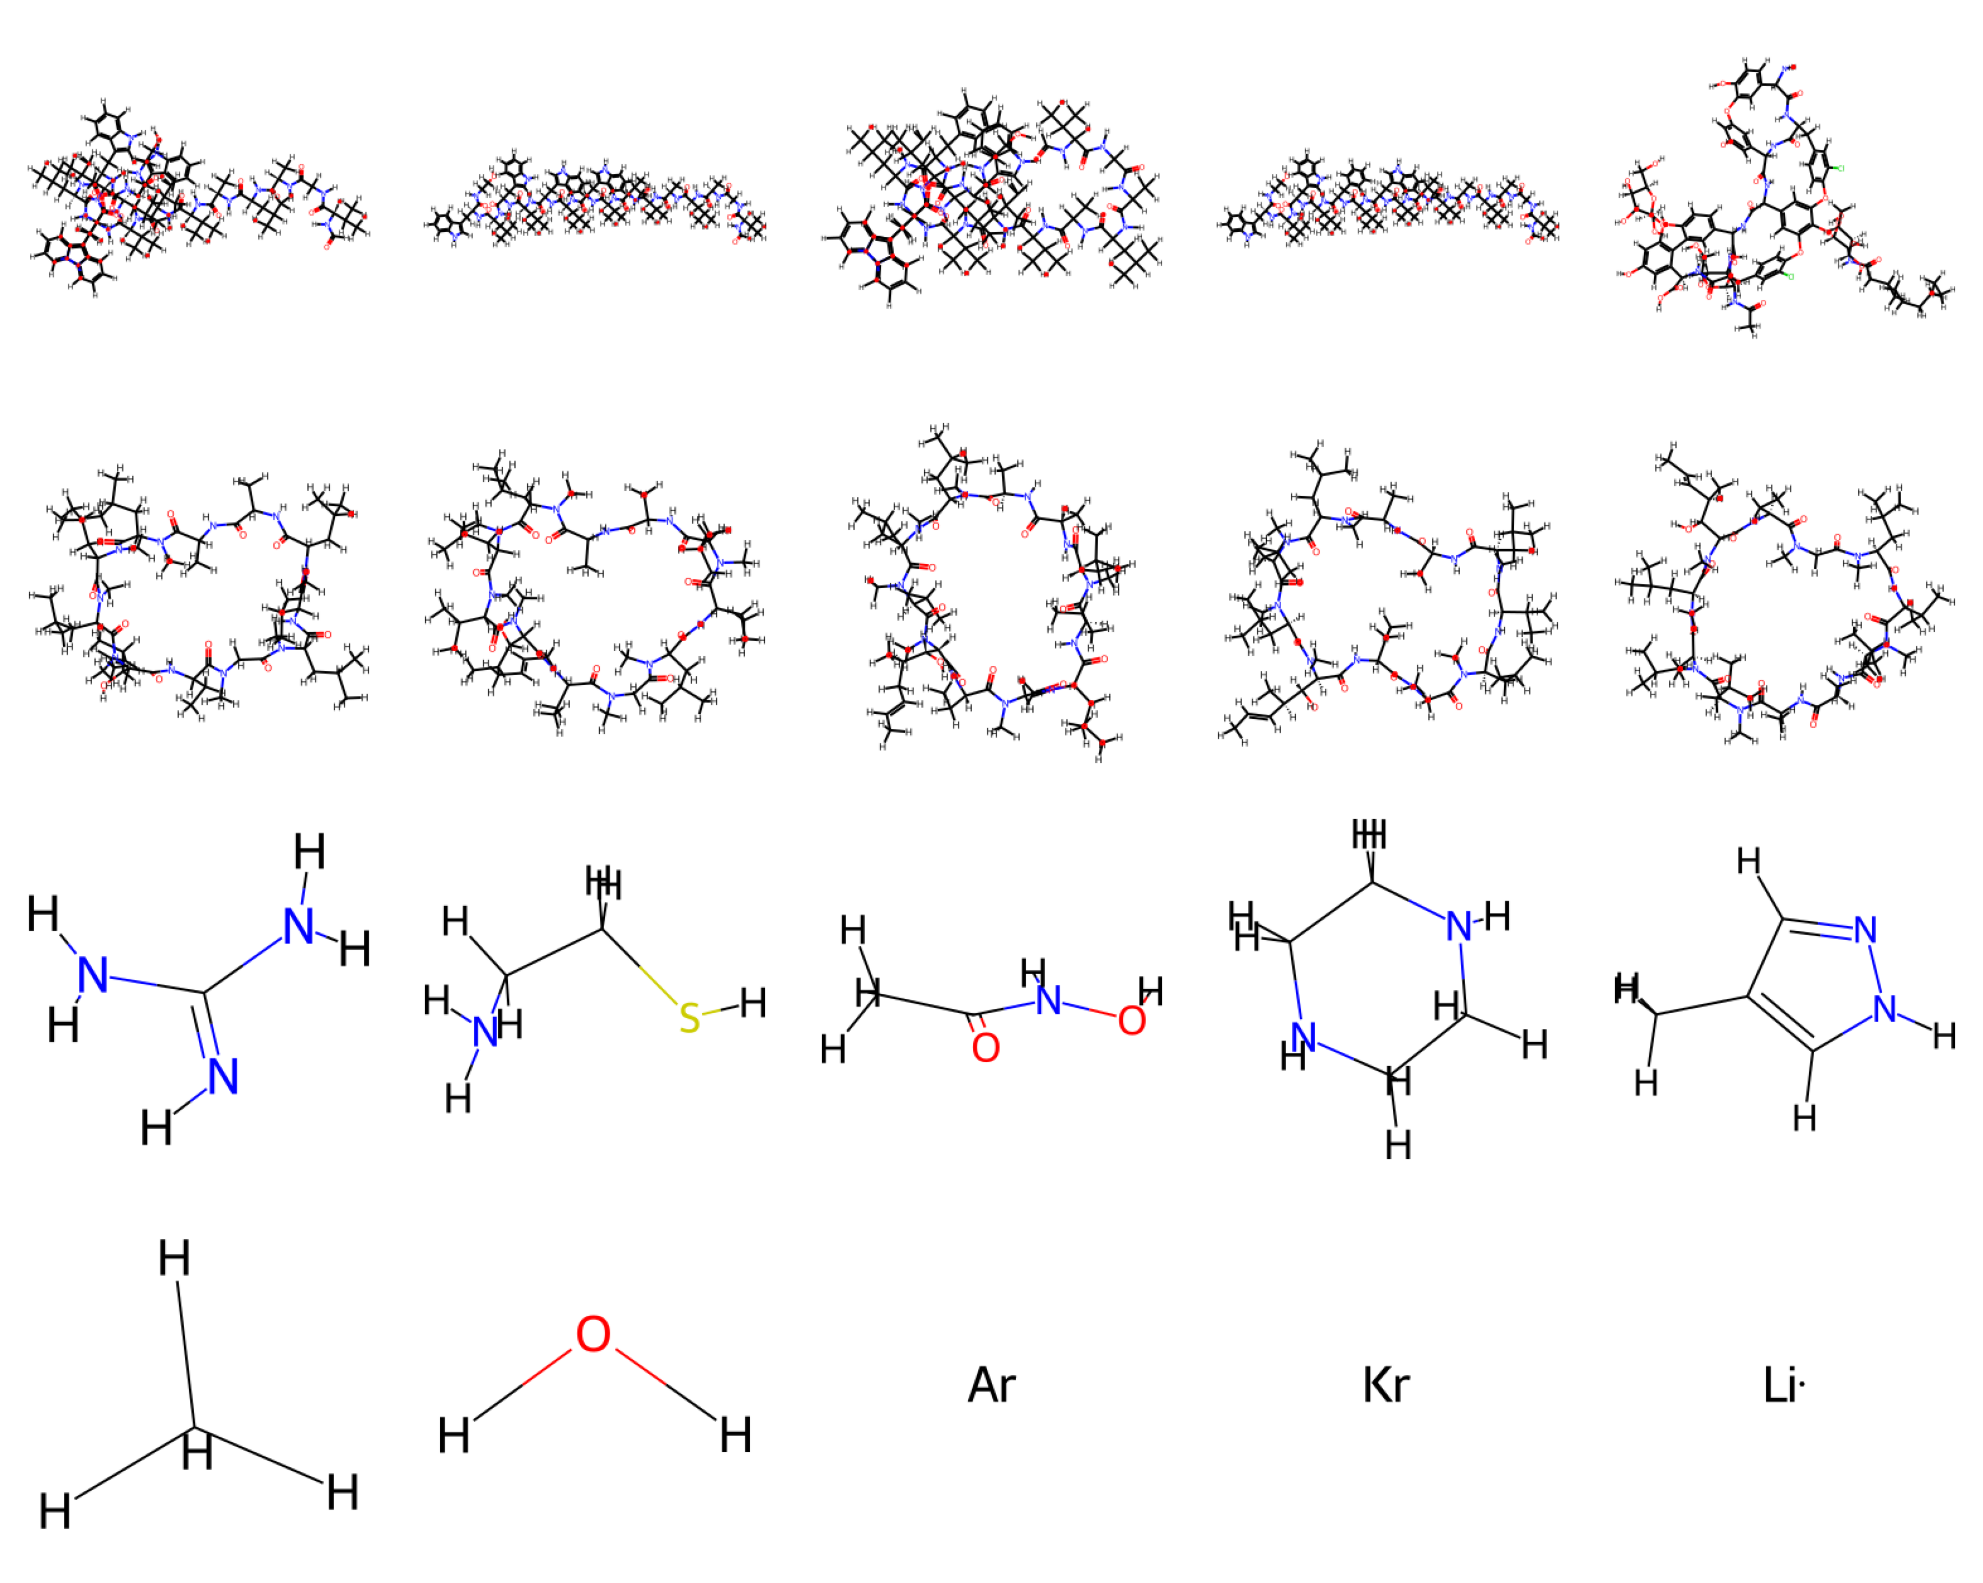

In [33]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

# Función para calcular el tamaño de la molécula (número de átomos)
def molecule_size(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return mol.GetNumAtoms()
    return None

# Calcular el tamaño de cada molécula y añadirlo al DataFrame
df['Size'] = df['SMILES'].apply(molecule_size)

# Filtrar moléculas que pasan y no pasan el criterio BBB+
passing = df[df['BBB+/BBB-'] == 'BBB+']
not_passing = df[df['BBB+/BBB-'] == 'BBB-']

# Seleccionar las 5 más largas y más pequeñas
longest_passing = passing.nlargest(5, 'Size')
shortest_passing = passing.nsmallest(5, 'Size')
longest_not_passing = not_passing.nlargest(5, 'Size')
shortest_not_passing = not_passing.nsmallest(5, 'Size')

# Crear una carpeta para guardar las imágenes
output_dir = 'molecule_images'
os.makedirs(output_dir, exist_ok=True)

# Función para guardar moléculas en imágenes 3D (2D renderizado)
def save_molecule_images(smiles_list, titles, file_prefix):
    for smiles, title in zip(smiles_list, titles):
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            mol = Chem.AddHs(mol)
            AllChem.EmbedMolecule(mol)  # Generar una conformación 3D
            img = Draw.MolToImage(mol, size=(300, 300))
            img_file = os.path.join(output_dir, f'{file_prefix}_{title}.png')
            img.save(img_file)
            print(f"Imagen guardada: {img_file}")


# Visualizar imágenes guardadas
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()
for i, file in enumerate(os.listdir(output_dir)):
    img = mpimg.imread(os.path.join(output_dir, file))
    axes[i].imshow(img)
    axes[i].axis('off')
plt.tight_layout()
plt.show()



In [45]:
# Relación entre Lipinski y BBB+/BBB-
print(df.groupby(['Lipinski', 'BBB+/BBB-']).size())

# Relación entre GhoseFilter y BBB+/BBB-
print(df.groupby(['GhoseFilter', 'BBB+/BBB-']).size())


Lipinski  BBB+/BBB-
False     BBB+          571
          BBB-         1220
True      BBB+         4385
          BBB-         1631
dtype: int64
GhoseFilter  BBB+/BBB-
False        BBB+         1013
             BBB-         1432
True         BBB+         3943
             BBB-         1419
dtype: int64


El análisis de los descriptores como Lipinski y GhoseFilter en el contexto de una calculadora de descriptores se basa en la necesidad de evaluar la viabilidad de compuestos químicos como candidatos para el desarrollo de fármacos.

* Análisis de los Descriptores Lipinski y GhoseFilter

De los 7807 datos totales, 4956 moléculas atraviesan la barrera hematoencefálica (BBB+) y 2851 no lo hacen (BBB-). Al analizar el descriptor Lipinski, se observa que 6016 moléculas cumplen con sus reglas, de las cuales 4385 son BBB+. Esto indica que la mayoría de las moléculas que siguen las reglas de Lipinski tienen una alta probabilidad de atravesar la BBB, reforzando su utilidad como predictor de permeabilidad. Sin embargo, también se identifica que 571 moléculas no cumplen con Lipinski y aún así son BBB+, lo que sugiere que algunas excepciones pueden atravesar la BBB incluso sin seguir este criterio.

* El análisis del GhoseFilter muestra que de las 5362 moléculas que cumplen con este filtro, 3943 atraviesan la BBB, lo que refuerza la relevancia de este descriptor para identificar moléculas con alta permeabilidad cerebral. Al igual que con Lipinski, hay un grupo significativo de moléculas que, aunque no cumplen con el GhoseFilter (1013 moléculas), atraviesan la BBB. Estos resultados, obtenidos mediante herramientas como Mordred, ChEMBL y RDKit, subrayan la importancia de ambos descriptores en la predicción de permeabilidad, pero también muestran la necesidad de considerarlos en conjunto con otros factores para un modelo más robusto.

* NOTA: 
El Ghose Filter es un conjunto de criterios que se utilizan para evaluar la calidad de las moléculas en el contexto del descubrimiento de fármacos. Este filtro se basa en una serie de propiedades físico-químicas que se consideran deseables para que una molécula tenga una buena probabilidad de ser un candidato exitoso para el desarrollo de medicamentos. A continuación, se describen algunos aspectos clave del Ghose Filter:

Características del Ghose Filter

Propiedades Físico-Químicas: El Ghose Filter evalúa propiedades como:
Peso Molecular (MW): Se establece un rango óptimo para el peso molecular, generalmente entre 160 y 480 g/mol.
Número de Átomos de Carbono: Se considera un rango adecuado para el número de átomos de carbono en la molécula.
LogP: El coeficiente de partición octanol-agua (LogP) debe estar dentro de un rango específico que indica la lipofilia o hidrofilia de la molécula.
Número de Enlaces Rotacionales: Un número adecuado de enlaces rotacionales es importante para la flexibilidad molecular.

Aplicación en el Descubrimiento de Fármacos: El Ghose Filter se utiliza como una herramienta inicial para filtrar compuestos durante las etapas tempranas del descubrimiento de fármacos. Ayuda a reducir la cantidad de compuestos a evaluar en estudios posteriores, aumentando así la eficiencia del proceso.

Criterios Cuantitativos: Los criterios del Ghose Filter son cuantitativos y permiten a los investigadores evaluar rápidamente si un compuesto cumple con los estándares deseados.